# Machine Learning Project - Part 1

In [1]:
from helper_functions.exploratory_analysis import *
from helper_functions.missing_values import *
from helper_functions.feature_selection import *
from helper_functions.feature_extraction import *
from helper_functions.feature_representation import *
pd.set_option('display.float_format', lambda x: '%.3f'%x)

## Get Data

In [2]:
path = '/Users/barganor/Downloads/XY_train (1).csv'

data = pd.read_csv(path)
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


## Exploratory Data Analysis

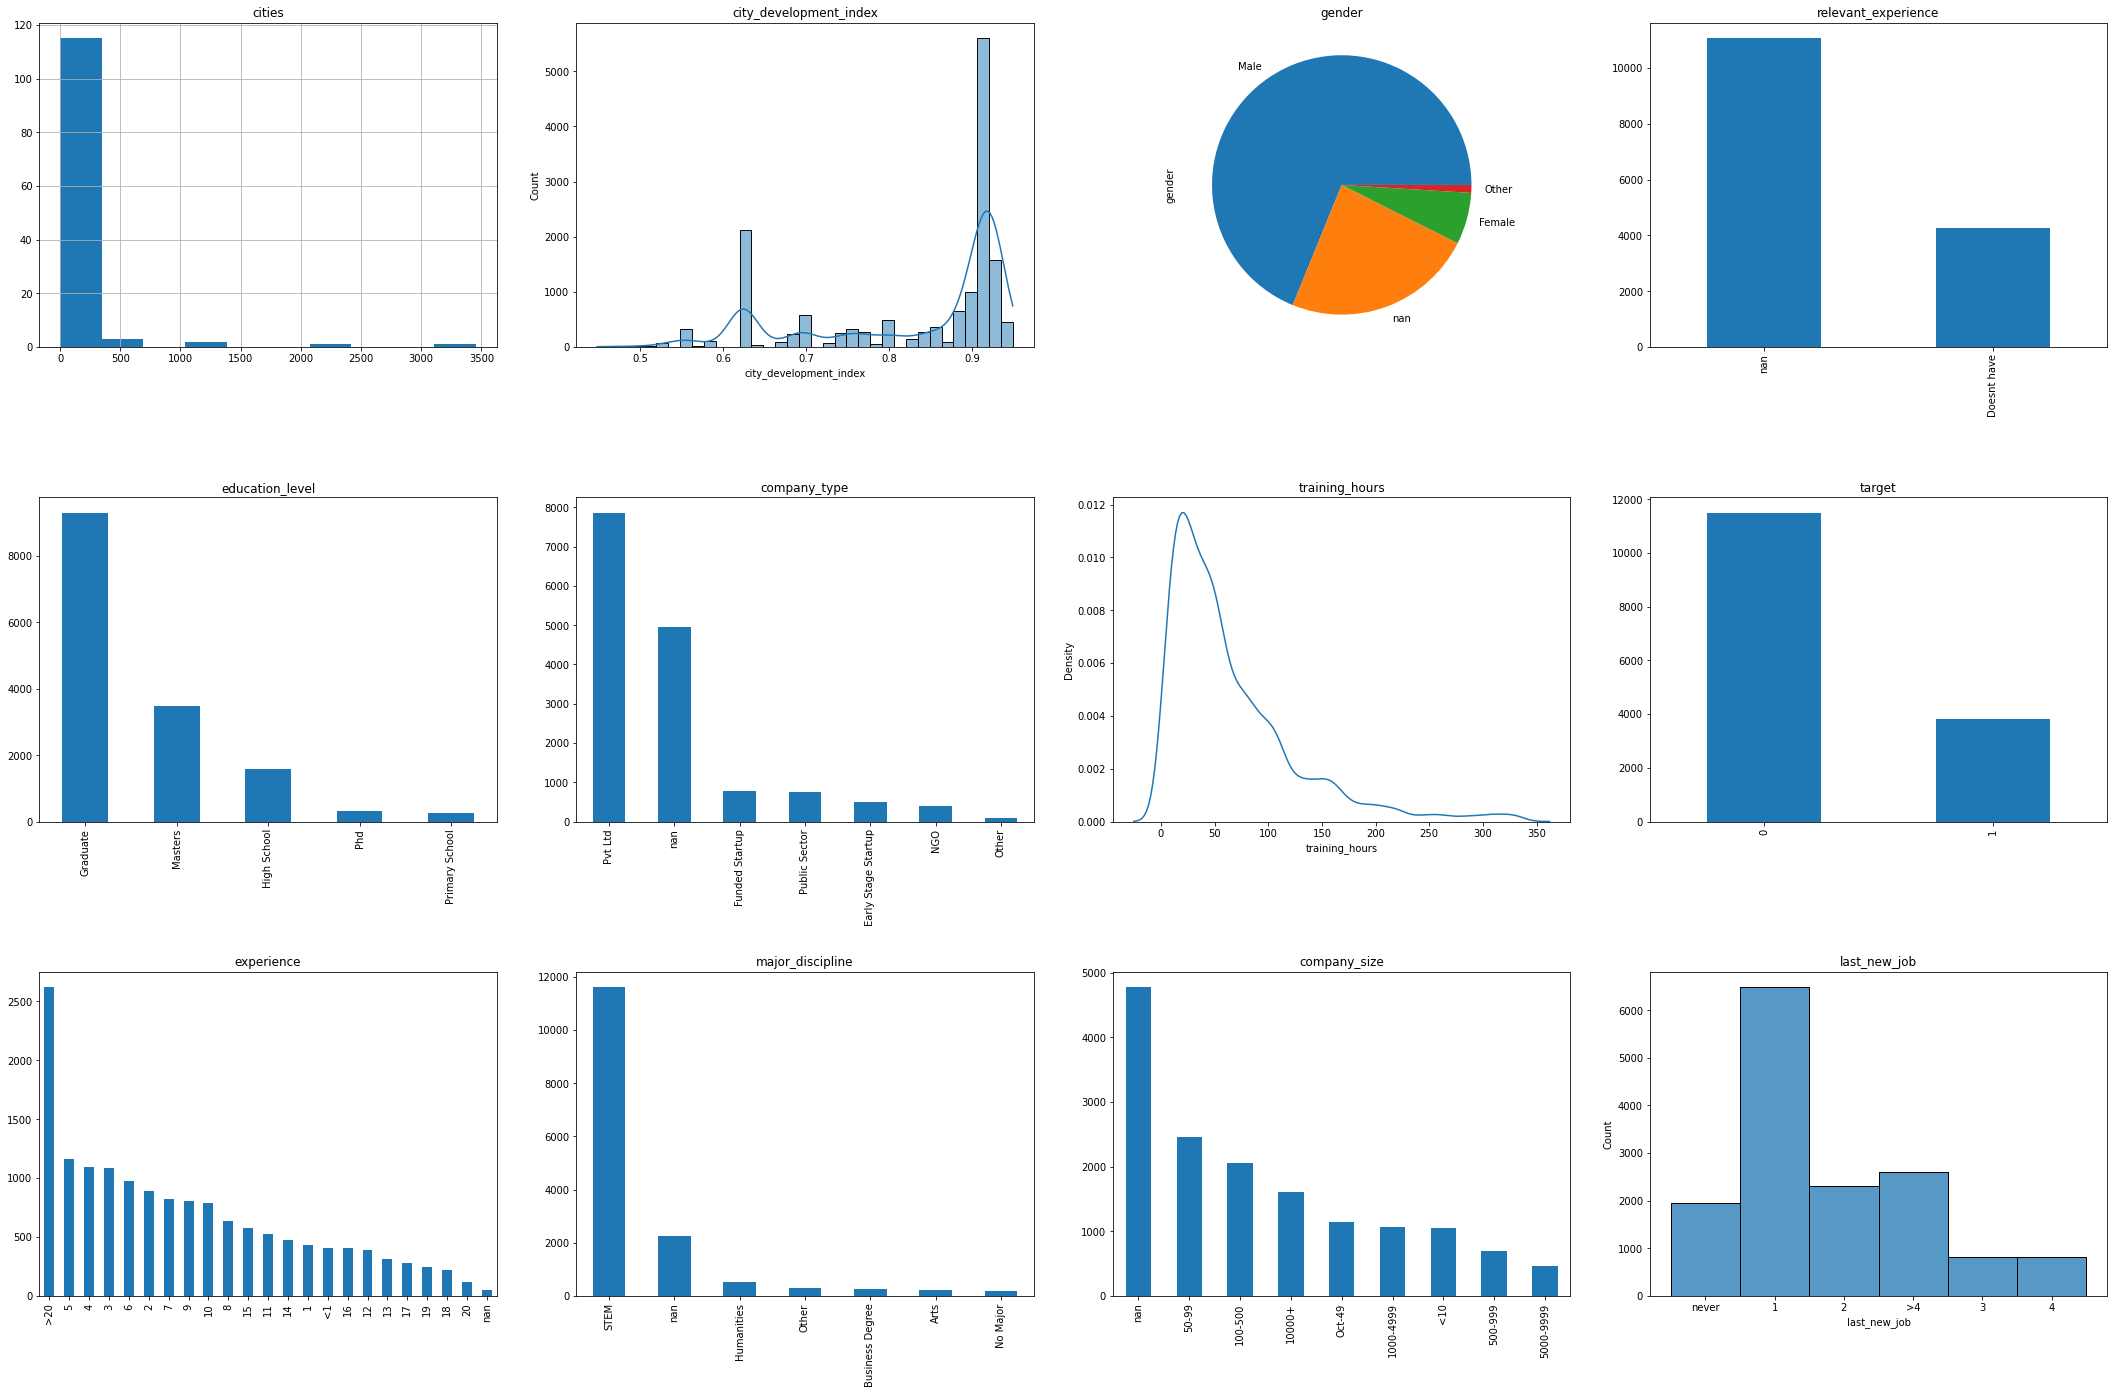

In [3]:
get_all_plots(data)

In [4]:
get_statistical_description(data)

,mean,std,50%,value_range
enrollee_id,16887.713,9612.279,17013.500,1.0 - 33380.0
city_development_index,0.829,0.123,0.903,0.448 - 0.949
training_hours,65.337,60.007,47.000,1.0 - 336.0
target,0.250,0.433,0.000,0.0 - 1.0


## Pre-Processing

In [5]:
processed_data = drop_nan_by_thresh(data, 12)

,Before,After,Difference
enrollee_id,0,0,0
city,0,0,0
city_development_index,0,0,0
gender,3639,2272,1367
relevent_experience,0,0,0
enrolled_university,311,105,206
education_level,370,56,314
major_discipline,2237,845,1392
experience,48,17,31
company_size,4779,2627,2152


#### Replace data with numeric

In [6]:
processed_data = replace_by_dict(processed_data, 'company_size')

Values before change  Values after change
                 <10                1.000
              Oct-49                2.000
               50-99                3.000
             100-500                4.000
             500-999                5.000
           1000-4999                6.000
           5000-9999                7.000
              10000+                8.000


In [7]:
processed_data = replace_by_dict(processed_data, 'last_new_job')

Values before change  Values after change
               never                0.000
                   1                1.000
                   2                2.000
                   3                3.000
                   4                4.000
                  >4                5.000


In [8]:
processed_data = replace_by_dict(processed_data, 'major_discipline')

Values before change  Values after change
                STEM                0.000
          Humanities                1.000
               Other                2.000
     Business Degree                3.000
                Arts                4.000
            No Major                5.000


In [9]:
processed_data = replace_by_dict(processed_data, 'experience')

Values before change Values after change
                  <1                   0
                   1                   1
                  10                  10
                  11                  11
                  12                  12
                  13                  13
                  14                  14
                  15                  15
                  16                  16
                  17                  17
                  18                  18
                  19                  19
                   2                   2
                  20                  20
                 >20                  25
                   3                   3
                   4                   4
                   5                   5
                   6                   6
                   7                   7
                   8                   8
                   9                   9


#### Dealing with missing values

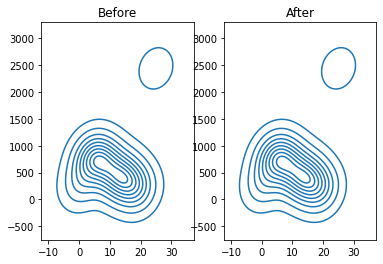

In [10]:
processed_data = fill_nan_with_median(processed_data, 'experience')

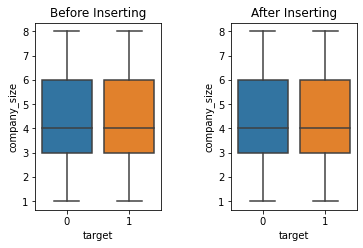

In [11]:
processed_data = fill_nan_with_probability(processed_data, 'company_size')

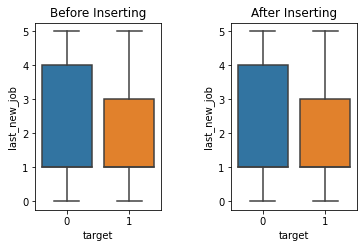

In [12]:
processed_data = fill_nan_with_probability(processed_data, 'last_new_job')

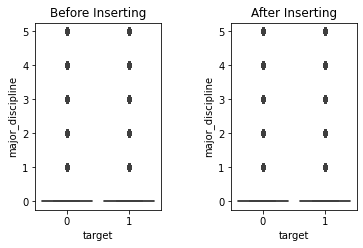

In [13]:
processed_data = fill_nan_with_probability(processed_data, 'major_discipline')

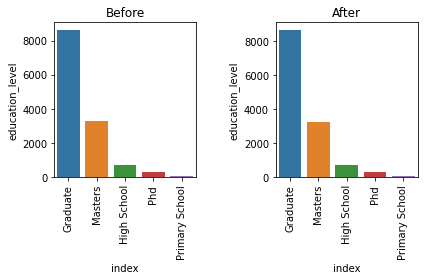

In [14]:
processed_data =  fill_nan_with_max_appear(processed_data, 'education_level')

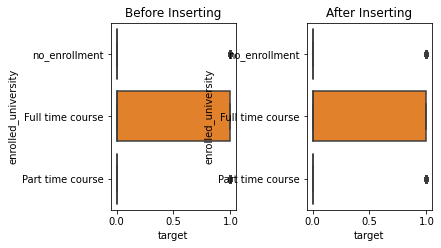

In [15]:
processed_data = fill_nan_with_probability(processed_data, 'enrolled_university')

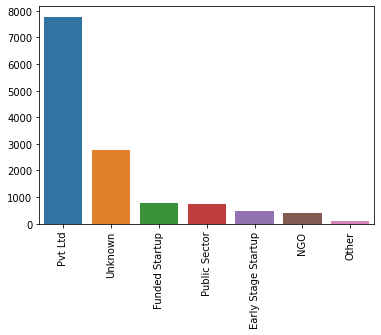

In [16]:
processed_data = fill_nan_with_unknown(processed_data, 'company_type')

Model Score on Self: 0.903435468895079


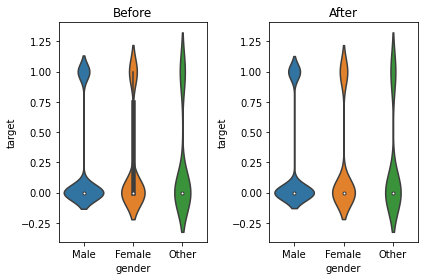

In [17]:
processed_data =fill_gender_with_knn(processed_data)

### Feature Extraction

In [18]:
processed_data = get_qualification_index(processed_data)

,Coef,P-value
Has relevent experience,-1.360,0.000
No relevent experience,-0.678,0.000
Full time course,-0.550,0.000
Part time course,-1.260,0.000
no_enrollment,-1.365,0.000
Graduate,-1.058,0.000
High School,-2.221,0.000
Masters,-1.376,0.000
Phd,-1.788,0.000
Primary School,-1.696,0.000


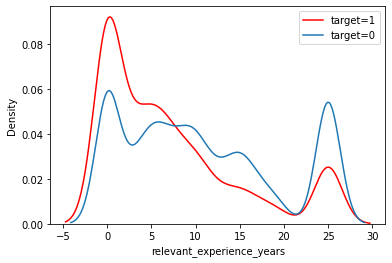

In [19]:
processed_data = get_relevant_experience_feature(processed_data)

### Feature Representation

In [24]:
processed_data = get_df_represented(processed_data)

Values before change  Values after change
      Primary School                    6
         High School                   12
            Graduate                   15
             Masters                   17
                 Phd                   20


### Feature Selection

In [27]:
categorical = ['major_discipline','Has relevent experience', 'Male', 'Female', 'Full time course', 'Part time course','enrollment']
get_categorical_vars_corr(processed_data, categorical)

,chi2_score,p_value
major_discipline,13.342,0.000
Has relevent experience,43.751,0.000
Male,0.141,0.708
Female,1.540,0.215
Full time course,220.346,0.000
Part time course,0.558,0.455
enrollment,45.027,0.000
